In [34]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from nbodykit.lab import *

Nmodel="Tree"
size=128
log=True

In [2]:
filename='data_HMass-DenDM_s'+str(size)+'_V.h5'
f = h5py.File(filename, 'r')
headers=list(f.keys())
print(headers)
print(f['DMD'].shape)
print(f['HM'].shape)
DMD=f['DMD']
DMD=np.array(DMD)
HM=f['HM']
HM=np.array(HM)
f.close()

['DMD', 'HM']
(128, 128, 128)
(128, 128, 128)


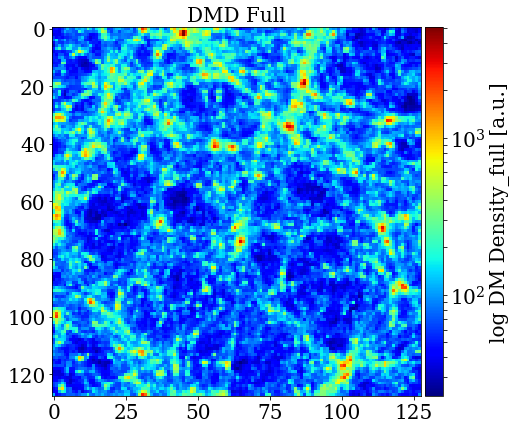

In [3]:
fig = plt.figure(figsize=(7, 7))
plt.jet()
plt.title("DMD Full",size=20)
ax=plt.gca()
DMD_full=DMD.reshape(size,size,size)
mesh = ArrayMesh(DMD_full, BoxSize=1.0)
if log!=True:
    plt.imshow(mesh.preview(axes=[0,1]))
else:
    plt.imshow(mesh.preview(axes=[0,1]),norm=mpl.colors.LogNorm())
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar=plt.colorbar(cax=cax)
cbar.ax.set_ylabel('log DM Density_full [a.u.]', size=20)
plt.show()

/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/nbodykit/algorithms/fftpower.py:610: RuntimeWarning: invalid value encountered in sqrt
  xslab **= 0.5


Text(0,0.5,'$P(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

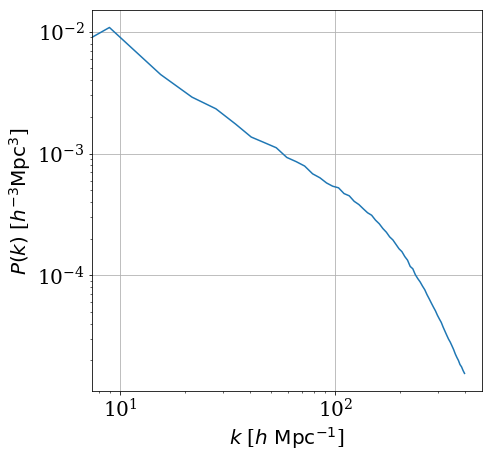

In [38]:
# compute the power, specifying desired linear k-binning
r = FFTPower(mesh, mode='1d')# the result is stored at "power" attribute
Pk = r.power
# print(Pk)
# print(Pk.coords)
# print out the meta-data
# for k in Pk.attrs:
#     print("%s = %s" %(k, str(Pk.attrs[k])))
# print the shot noise subtracted P(k)
fig=plt.figure(figsize=(7,7))
plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'])
plt.grid()
# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",size=20)
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]",size=20)

In [27]:
# compute the 2D power
r = FFTPower(mesh, mode='2d', Nmu=5, los=[0,0,1])
Pkmu = r.power
print(Pkmu)

<BinnedStatistic: dims: (k: 64, mu: 5), variables: ('k', 'mu', 'power', 'modes')>


/home/toshiba/Software/Anaconda3/lib/python3.6/site-packages/nbodykit/algorithms/fftpower.py:610: RuntimeWarning: invalid value encountered in sqrt
  xslab **= 0.5


In [28]:
print(Pkmu.coords)

{'k': array([  3.14159265,   9.42477796,  15.70796327,  21.99114858,
        28.27433388,  34.55751919,  40.8407045 ,  47.1238898 ,
        53.40707511,  59.69026042,  65.97344573,  72.25663103,
        78.53981634,  84.82300165,  91.10618695,  97.38937226,
       103.67255757, 109.95574288, 116.23892818, 122.52211349,
       128.8052988 , 135.0884841 , 141.37166941, 147.65485472,
       153.93804003, 160.22122533, 166.50441064, 172.78759595,
       179.07078125, 185.35396656, 191.63715187, 197.92033718,
       204.20352248, 210.48670779, 216.7698931 , 223.0530784 ,
       229.33626371, 235.61944902, 241.90263433, 248.18581963,
       254.46900494, 260.75219025, 267.03537556, 273.31856086,
       279.60174617, 285.88493148, 292.16811678, 298.45130209,
       304.7344874 , 311.01767271, 317.30085801, 323.58404332,
       329.86722863, 336.15041393, 342.43359924, 348.71678455,
       354.99996986, 361.28315516, 367.56634047, 373.84952578,
       380.13271108, 386.41589639, 392.6990817 , 

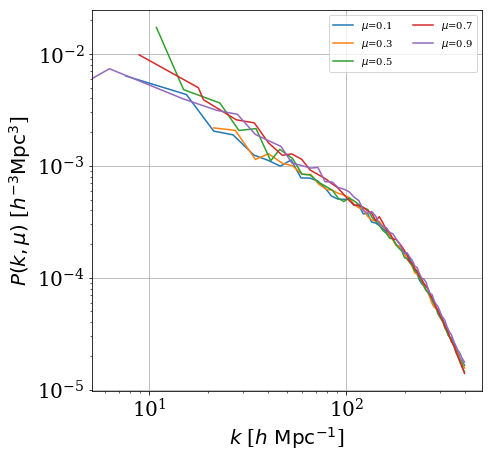

In [33]:
# plot each mu bin
fig=plt.figure(figsize=(7,7))
for i in range(Pkmu.shape[1]):
    Pk = Pkmu[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",size=20)
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]",size=20)
plt.grid()